## Machine Learning Classifier to create a Spam Detection Filter:

### Dataset source: University California Irvine

https://archive.ics.uci.edu/ml/index.php

#### Import NLTK & Basic python packages:

In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
        C:\Users\User.DESKTOP-3HHGVTH\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


#### Load Dataset:

In [22]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('SpamDataCollection', sep='\t', names = ['Label', 'Message'])
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Exploratory Data Analysis:

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
Label      5572 non-null object
Message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [24]:
df.describe()

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [25]:
df.groupby('Label').describe()

Message                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [26]:
# Creating new column for message length:
df['Length'] = df['Message'].apply(len)
df.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


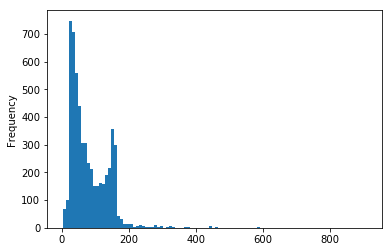

In [27]:
# Visualizing message length:
df['Length'].plot.hist(bins=100)

In [28]:
df['Message'].describe()

count                       5572
unique                      5169
top       Sorry, I'll call later
freq                          30
Name: Message, dtype: object

In [29]:
df['Label'].describe()

count     5572
unique       2
top        ham
freq      4825
Name: Label, dtype: object

In [30]:
df['Length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: Length, dtype: float64

In [31]:
# Checking highest and lowest message:
print(df[df['Length']==910])
print(df[df['Length']==2])

     Label                                            Message  Length
1085   ham  For me the love should start with attraction.i...     910
     Label Message  Length
1925   ham      Ok       2
3051   ham      Ok       2
4498   ham      Ok       2
5357   ham      Ok       2


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F5E29B108>,
      dtype=object)

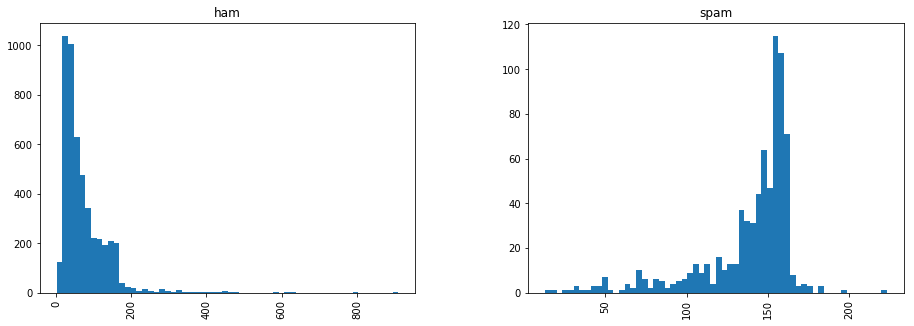

In [36]:
# Comparing Ham vs Spam:
df.hist(column='Length', by='Label', bins=60, figsize=(15,5))

#### Removing Punctuations:

In [37]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
# Checking punctuation removal
sample_message = 'This is a !@string with $lots of ,punctutations..'
nopunc = [p for p in sample_message if p not in string.punctuation]
''.join(nopunc)

'This is a string with lots of punctutations'

#### Import Stopwords from NLTK Corpus:

In [44]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

#### Remove Stopwords & Punctuations from the Dataset:

In [45]:
# Create a method:
def stopword_removal(text):
    '''
    1. Remove punctuation
    2. Remove stopwords
    3. Return clean data
    '''
    nopunc = [mes for mes in text if mes not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    

In [46]:
df.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Stemming won't be helpful in this scenario due to presence of multiple shorthands. Hence now, we will move on to representing the text data in numerical manner for our Machine Learning model to interpret and predict

#### Vectorization: Word count from text:

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
bag_of_words_transformer = CountVectorizer(analyzer=stopword_removal)
bag_of_words_transformer.fit(df['Message'])

CountVectorizer(analyzer=<function stopword_removal at 0x0000020F6223C4C8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [51]:
# Checking vocabulary length for our dataset:
len(bag_of_words_transformer.vocabulary_)

11425

#### Transformation: Sparse Matrix Creation:

In [52]:
messages_bag_of_words = bag_of_words_transformer.transform(df['Message'])
print('Shape of Sparse Matrix: ', messages_bag_of_words.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [53]:
# Check the no of non zero occurences:
messages_bag_of_words.nnz

50548

#### Perform TF-IDF Transformation:

In [54]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

In [55]:
tfidf_transformer.fit(messages_bag_of_words)
messages_tfidf = tfidf_transformer.transform(messages_bag_of_words)

#### Split Dataset into Train & Test Split:

In [56]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(df['Message'], df['Label'], test_size=0.3)

#### Build Naive Bayes Classifier Model:

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [58]:
classifier = MultinomialNB()

In [59]:
pipeline = Pipeline(
[
    ('bagofwords',CountVectorizer(analyzer=stopword_removal)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bagofwords', CountVectorizer(analyzer=<function stopword_removal at 0x0000020F6223C4C8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), ...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [60]:
predictions = pipeline.predict(msg_test)

#### Model Evaluation Metrics:

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
print(confusion_matrix(label_test,predictions))

[[1449    0]
 [  76  147]]


In [63]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1449
        spam       1.00      0.66      0.79       223

   micro avg       0.95      0.95      0.95      1672
   macro avg       0.98      0.83      0.88      1672
weighted avg       0.96      0.95      0.95      1672

